In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

import missingno as msno # Eksik değer görselleştirme için harikadır

/kaggle/input/cardekho-cleaned/cardekho.csv


# Data Understanding

In [2]:
df = pd.read_csv("/kaggle/input/cardekho-cleaned/cardekho.csv")

In [3]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Data Cleaning

In [4]:
df = df.drop("Unnamed: 0" , axis = 1)

In [5]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [7]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
df["seats"].value_counts()

seats
5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: count, dtype: int64

In [9]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15406    False
15407    False
15408    False
15409    False
15410    False
Length: 15411, dtype: bool

In [11]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti Wagon R,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai i20,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [12]:
df = df.drop_duplicates(keep = "first" ,  ignore_index = True)

In [13]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [14]:
df["seats"] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
15239    False
15240    False
15241    False
15242    False
15243    False
Name: seats, Length: 15244, dtype: bool

In [15]:
df[df["seats"] == 0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3207,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12504,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [16]:
df.loc[df["seats"] == 0 ] 

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3207,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12504,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [17]:
df.loc[df["seats"] == 0 , "seats"] = 5

In [18]:
df.loc[df["seats"] == 0 ]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [19]:
df["seats"].value_counts()

seats
5    12769
7     1902
8      310
6      125
4       76
9       55
2        7
Name: count, dtype: int64

In [20]:
pd.set_option("display.float_format" , "{:.2f}".format)

In [21]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00
mean,6.04,55639.58,19.70,1486.17,100.61,5.33,774701.45
std,3.02,51766.30,4.17,520.42,42.92,0.81,894676.08
min,0.00,100.00,4.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [22]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Keşifsel Veri Analizi (EDA)

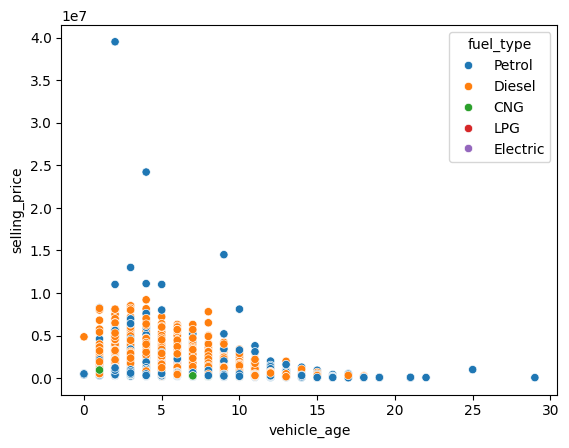

In [23]:
sns.scatterplot(x = df["vehicle_age"] , y = df["selling_price"] , hue =df["fuel_type"])
plt.show()

In [24]:
 df = df[(df["selling_price"] < 15000000)]

In [25]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15242.00,15242.00,15242.00,15242.00,15242.00,15242.00,15242.00
mean,6.04,55646.31,19.70,1485.68,100.54,5.33,770623.86
std,3.02,51766.37,4.17,518.45,42.56,0.81,816170.02
min,0.00,100.00,6.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,5998.00,626.00,9.00,14500000.00


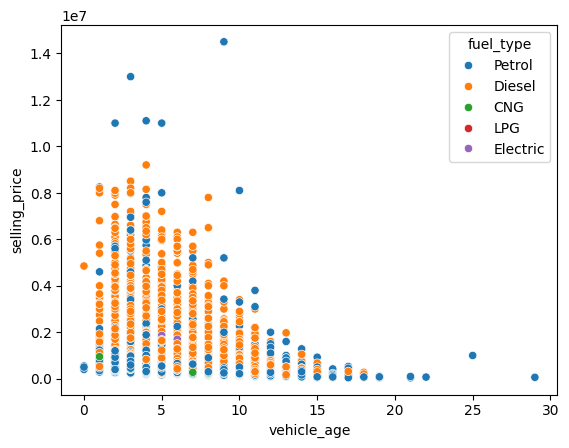

In [26]:
sns.scatterplot(x = df["vehicle_age"] , y = df["selling_price"] , hue =df["fuel_type"])
plt.show()

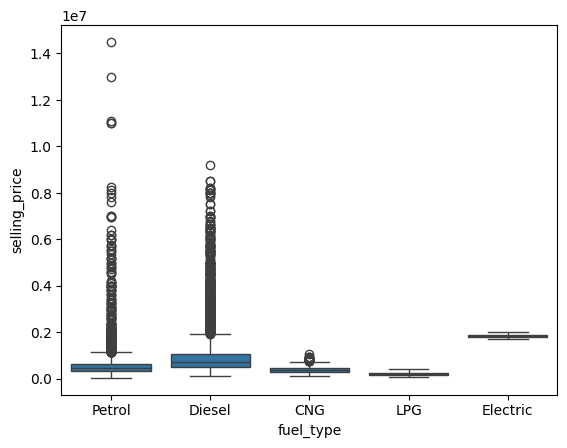

In [27]:
sns.boxplot( data = df  ,x = "fuel_type" , y = "selling_price" )
plt.show()

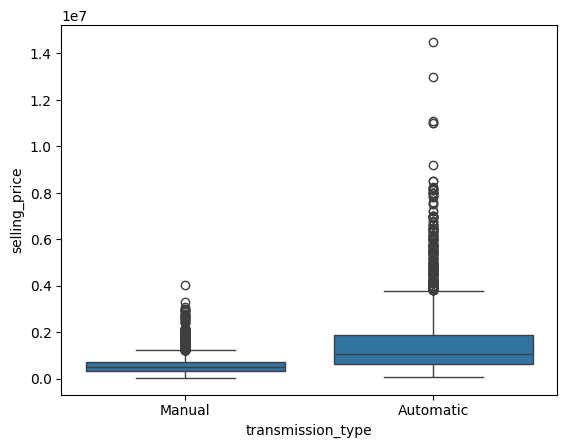

In [28]:
sns.boxplot( data = df  ,x = "transmission_type" , y = "selling_price" )
plt.show()

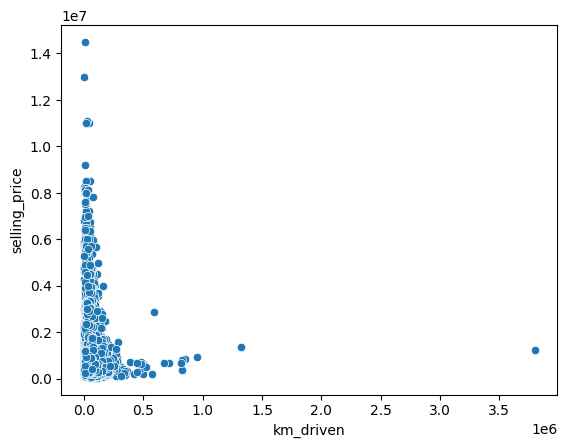

In [29]:
sns.scatterplot(x = df["km_driven"] , y = df["selling_price"] )
plt.show()

In [30]:
df["km_driven"].max()

3800000

In [31]:
df = df[(df["km_driven"] < 1000000)]

In [32]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00
mean,6.04,55317.32,19.70,1485.54,100.53,5.33,770556.03
std,3.02,40672.44,4.17,518.31,42.55,0.81,816201.78
min,0.00,100.00,6.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,558500.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,950000.00,33.54,5998.00,626.00,9.00,14500000.00


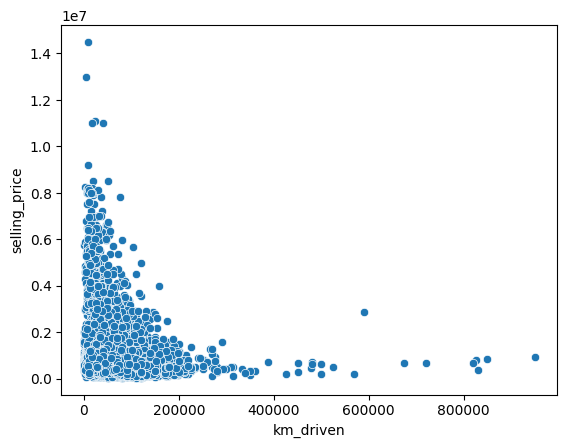

In [33]:
sns.scatterplot(x = df["km_driven"] , y = df["selling_price"] )
plt.show()

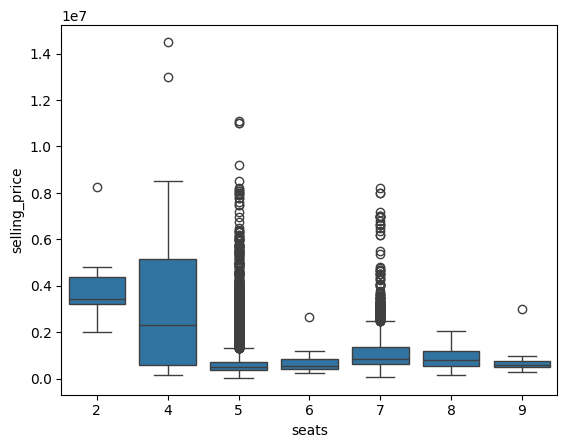

In [34]:
sns.boxplot( data = df  ,x = "seats" , y = "selling_price" )
plt.show()

In [35]:
df.corr(numeric_only = True)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.00,0.42,-0.26,0.10,0.01,0.03,-0.26
km_driven,0.42,1.00,-0.12,0.23,0.05,0.23,-0.11
mileage,-0.26,-0.12,1.00,-0.63,-0.53,-0.44,-0.32
engine,0.10,0.23,-0.63,1.00,0.81,0.56,0.61
max_power,0.01,0.05,-0.53,0.81,1.00,0.18,0.77
seats,0.03,0.23,-0.44,0.56,0.18,1.00,0.13
selling_price,-0.26,-0.11,-0.32,0.61,0.77,0.13,1.00


# Preprocessing

In [36]:
X = df.drop("selling_price" , axis = 1)
y = df["selling_price"]

In [37]:
X.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [38]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 17)

In [39]:
cat_cols = df.select_dtypes("object").columns.to_list()

In [40]:
cat_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [41]:
unique_values = df[cat_cols].nunique()

In [42]:
unique_values

car_name             119
brand                 30
model                118
seller_type            3
fuel_type              5
transmission_type      2
dtype: int64

**seller_type , fuel_type , transmission_type ==> onehotencoding**

**car_name , brand , model ==> frequency encoding**

In [43]:
onehot_columns = ["seller_type" , "fuel_type" , "transmission_type"]
freq_columns = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [44]:
for col in freq_columns:
    freq = X_train[col].value_counts() / len(X_train)

    X_train[col + "_freq"] = X_train[col].map(freq)


    X_test[col + "_freq"] = X_test[col].map(freq)

    mean_freq = freq.mean()

    X_test[col + "_freq"] = X_test[col + "_freq"].fillna(mean_freq)

In [45]:
X_train.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq,seller_type_freq,fuel_type_freq,transmission_type_freq
13863,Hyundai Santro,Hyundai,Santro,2,20000,Individual,Petrol,Manual,20.30,1086,68.00,5,0.01,0.19,0.01,0.37,0.49,0.80
9543,Maruti Swift Dzire,Maruti,Swift Dzire,4,26000,Dealer,Petrol,Automatic,18.50,1197,83.14,5,0.06,0.33,0.06,0.62,0.49,0.20
5715,Hyundai Grand,Hyundai,Grand,6,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,0.04,0.19,0.04,0.37,0.49,0.80
4849,Maruti Alto,Maruti,Alto,10,50000,Individual,Petrol,Manual,20.92,998,67.10,5,0.05,0.33,0.05,0.37,0.49,0.80
8696,Maruti Alto,Maruti,Alto,4,18000,Individual,Petrol,Manual,24.70,796,47.30,5,0.05,0.33,0.05,0.37,0.49,0.80


In [46]:
X_test.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq,seller_type_freq,fuel_type_freq,transmission_type_freq
13408,Maruti Swift,Maruti,Swift,3,20000,Dealer,Petrol,Manual,22.00,1197,81.80,5,0.05,0.33,0.05,0.62,0.49,0.80
521,Maruti Swift Dzire,Maruti,Swift Dzire,2,14000,Dealer,Diesel,Manual,19.30,1248,73.90,5,0.06,0.33,0.06,0.62,0.49,0.80
3900,Maruti Wagon R,Maruti,Wagon R,7,40330,Individual,Petrol,Manual,20.51,998,67.04,5,0.05,0.33,0.05,0.37,0.49,0.80
13530,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,6,20000,Dealer,Diesel,Automatic,13.50,2987,254.79,5,0.00,0.02,0.00,0.62,0.49,0.20
10677,Honda Amaze,Honda,Amaze,5,46000,Dealer,Petrol,Manual,18.00,1198,86.70,5,0.02,0.10,0.02,0.62,0.49,0.80


In [47]:
X_train = X_train.drop(['car_name', 'brand', 'model'] , axis = 1)
X_test = X_test.drop(['car_name', 'brand', 'model'] , axis = 1)

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [49]:
transformer = ColumnTransformer (
    transformers = [
        ("onehot" , OneHotEncoder(drop = "first" , handle_unknown = "ignore"), onehot_columns)
    ] , remainder = "passthrough"
)

In [50]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [51]:
encoded_cols = transformer.get_feature_names_out()


In [52]:
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats', 'remainder__car_name_freq',
       'remainder__brand_freq', 'remainder__model_freq',
       'remainder__seller_type_freq', 'remainder__fuel_type_freq',
       'remainder__transmission_type_freq'], dtype=object)

In [53]:
X_train = pd.DataFrame(X_train , columns = encoded_cols)
X_test = pd.DataFrame(X_test , columns = encoded_cols)

In [54]:
X_train.head()

,onehot__seller_type_Individual,onehot__seller_type_Trustmark Dealer,onehot__fuel_type_Diesel,onehot__fuel_type_Electric,onehot__fuel_type_LPG,onehot__fuel_type_Petrol,onehot__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats,remainder__car_name_freq,remainder__brand_freq,remainder__model_freq,remainder__seller_type_freq,remainder__fuel_type_freq,remainder__transmission_type_freq
0,1.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00,20000.00,20.30,1086.00,68.00,5.00,0.01,0.19,0.01,0.37,0.49,0.80
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,4.00,26000.00,18.50,1197.00,83.14,5.00,0.06,0.33,0.06,0.62,0.49,0.20
2,1.00,0.00,0.00,0.00,0.00,1.00,1.00,6.00,20000.00,18.90,1197.00,82.00,5.00,0.04,0.19,0.04,0.37,0.49,0.80
3,1.00,0.00,0.00,0.00,0.00,1.00,1.00,10.00,50000.00,20.92,998.00,67.10,5.00,0.05,0.33,0.05,0.37,0.49,0.80
4,1.00,0.00,0.00,0.00,0.00,1.00,1.00,4.00,18000.00,24.70,796.00,47.30,5.00,0.05,0.33,0.05,0.37,0.49,0.80


In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12192 entries, 0 to 12191
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   onehot__seller_type_Individual        12192 non-null  float64
 1   onehot__seller_type_Trustmark Dealer  12192 non-null  float64
 2   onehot__fuel_type_Diesel              12192 non-null  float64
 3   onehot__fuel_type_Electric            12192 non-null  float64
 4   onehot__fuel_type_LPG                 12192 non-null  float64
 5   onehot__fuel_type_Petrol              12192 non-null  float64
 6   onehot__transmission_type_Manual      12192 non-null  float64
 7   remainder__vehicle_age                12192 non-null  float64
 8   remainder__km_driven                  12192 non-null  float64
 9   remainder__mileage                    12192 non-null  float64
 10  remainder__engine                     12192 non-null  float64
 11  remainder__max_

# Model Evaluation

In [56]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [57]:
model = AdaBoostRegressor()

In [58]:
model.fit(X_train , y_train)

AdaBoostRegressor()

In [59]:
y_pred = model.predict(X_test)

In [60]:
print("r2 score : " , r2_score(y_test , y_pred))
print("mean_absolute_error : " , mean_absolute_error(y_test , y_pred))
print("mean_squared_error : " , mean_squared_error(y_test , y_pred))

r2 score :  0.6104224037313013
mean_absolute_error :  408118.7100446579
mean_squared_error :  263504876060.2727


In [61]:
params = {
    "n_estimators" : [50 , 80 , 100 , 120],
    "learning_rate" : [0.001 , 0.01 , 1.0 , 2.0],
    "loss" : ["linear" , "square" , "exponential"]
}

In [62]:
rcv = RandomizedSearchCV(estimator = AdaBoostRegressor() , param_distributions = params , scoring = "r2" , cv = 5)

In [63]:
rcv.fit(X_train , y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [64]:
rcv.best_params_

{'n_estimators': 120, 'loss': 'linear', 'learning_rate': 0.01}

In [65]:
y_pred = rcv.predict(X_test)

In [66]:
print("r2 score : " , r2_score(y_test , y_pred))
print("mean_absolute_error : " , mean_absolute_error(y_test , y_pred))
print("mean_squared_error : " , mean_squared_error(y_test , y_pred))

r2 score :  0.7708679830018673
mean_absolute_error :  228210.26069881287
mean_squared_error :  154981714346.04227


In [67]:
params = {
    "estimator__max_depth" : [3 , 4 ,5],
    "n_estimators" : [50 , 80 , 100 , 120],
    "learning_rate" : [0.001 , 0.01 , 1.0 , 2.0],
    "loss" : ["linear" , "square" , "exponential"]
}

In [68]:
rcv = RandomizedSearchCV(estimator = AdaBoostRegressor(DecisionTreeRegressor()) , param_distributions = params , scoring = "r2" , cv = 5)

In [69]:
rcv.fit(X_train , y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   param_distributions={'estimator__max_depth': [3, 4, 5],
                                        'learning_rate': [0.001, 0.01, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [70]:
rcv.best_params_

{'n_estimators': 100,
 'loss': 'square',
 'learning_rate': 0.01,
 'estimator__max_depth': 5}

In [71]:
y_pred = rcv.predict(X_test)

In [72]:
print("r2 score : " , r2_score(y_test , y_pred))
print("mean_absolute_error : " , mean_absolute_error(y_test , y_pred))
print("mean_squared_error : " , mean_squared_error(y_test , y_pred))

r2 score :  0.8663589329776191
mean_absolute_error :  149058.5847248383
mean_squared_error :  90392961863.25508


In [73]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor




models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=17),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=17),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=17),
    "CatBoost": CatBoostRegressor(n_estimators=100, learning_rate=0.1, verbose=0, random_state=17)
}


results = []

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    results.append({"Model": name, "R2 Score": r2, "MAE": mae})


df_results = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(df_results)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 12192, number of used features: 18
[LightGBM] [Info] Start training from score 769257.043553
           Model  R2 Score       MAE
2       LightGBM      0.93  98244.47
0  Random Forest      0.93  99716.17
3       CatBoost      0.91 116604.72
1        XGBoost      0.91  99080.86


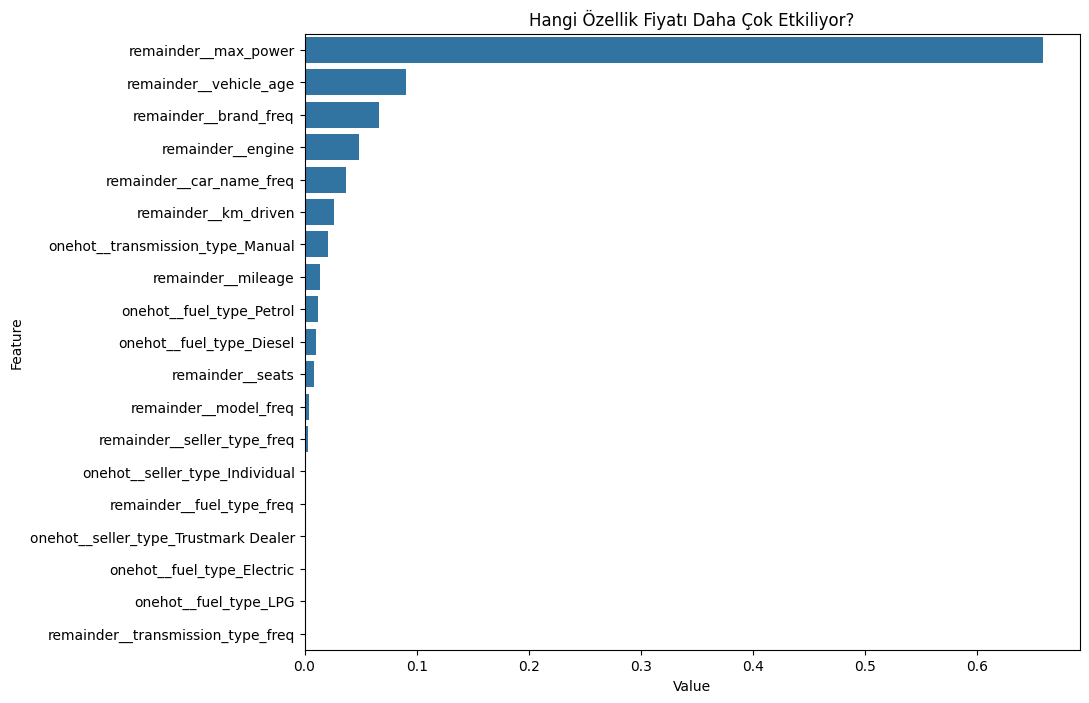

In [74]:

best_model = XGBRegressor().fit(X_train, y_train)

feature_imp = pd.DataFrame({'Value': best_model.feature_importances_, 'Feature': X_train.columns})
plt.figure(figsize=(10, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Hangi Özellik Fiyatı Daha Çok Etkiliyor?')
plt.show()

In [75]:
model.fit(X_train, np.log1p(y_train))


y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log) 

In [76]:
df['km_per_year'] = df['km_driven'] / (df['vehicle_age'] + 1)

In [77]:
df['km_per_year']

0       12000.00
1        3333.33
2        5000.00
3        3700.00
4        4285.71
          ...   
15238    1538.17
15239    1072.30
15240    6000.00
15241    9571.43
15243    4333.33
Name: km_per_year, Length: 15240, dtype: float64

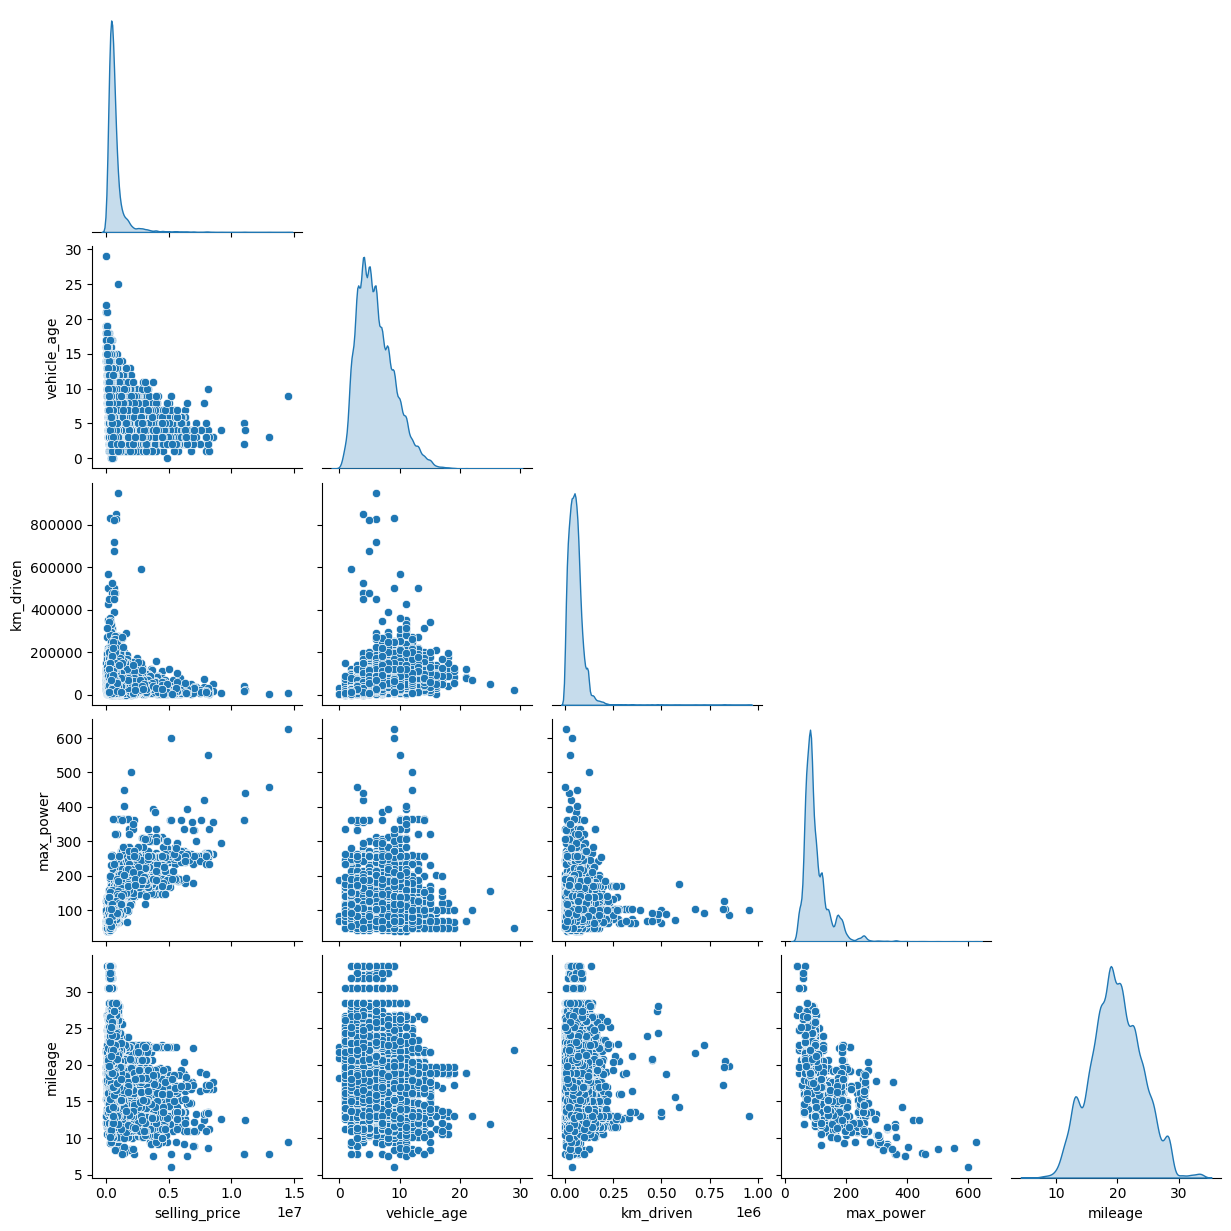

In [78]:
cols_to_plot = ['selling_price', 'vehicle_age', 'km_driven', 'max_power', 'mileage']
sns.pairplot(df[cols_to_plot], diag_kind='kde', corner=True)
plt.show()